In [148]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Generate Coordinates

In [184]:
substrate_diameter = 300.0 - 3 * 2
n_radii = 13
point_density = 8

In [186]:
# Generate sample locations with coordinates X, Y
X = np.array([0.])  # initialize X coordinates with center point
Y = np.array([0.])  # initialize Y coordinates with center point
radii = np.linspace(0, substrate_diameter / 2, n_radii)[1:]  # remove center point to be added manually

for i, radius in enumerate(radii):
    # for each radius determine angular increment between points
    angle_increment = 360. / (point_density * (i + 1))  # for every raidus points are located at each incremental angle
    angles = np.radians(np.linspace(0, 360 - angle_increment, 360 / angle_increment))  # all angles for the radius
    X = np.append(X, radius * np.cos(angles))
    Y = np.append(Y, radius * np.sin(angles))

C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


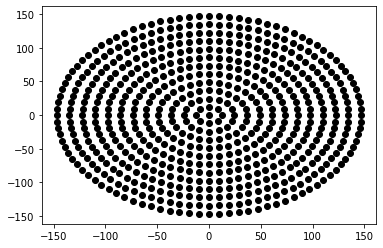

In [187]:
plt.figure(0)
plt.plot(X, Y, 'o', color='black')

### Generate data table

              X          Y      R     Noise  Radial_Dependence  \
0  0.000000e+00   0.000000   0.00  0.625853           0.000000   
1  1.225000e+01   0.000000  12.25  0.795742           0.416667   
2  8.662058e+00   8.662058  12.25  0.360570           0.416667   
3  7.500962e-16  12.250000  12.25  0.620773           0.416667   
4 -8.662058e+00   8.662058  12.25  0.472153           0.416667   

   Thickness_Concave  
0           0.625853  
1           1.212408  
2           0.777237  
3           1.037440  
4           0.888820  


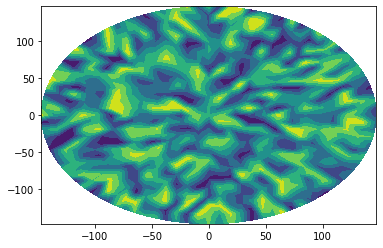

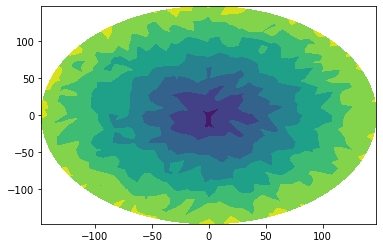

In [212]:
data = pd.DataFrame({'X': X, 'Y': Y, 'R': np.sqrt(data.X * data.X + data.Y * data.Y)})
radial_dependence_amplitude =  10 / substrate_diameter
noise_amplitude = 1
data['Noise'] = np.random.rand(X.shape[0]) * noise_amplitude
data['Radial_Dependence'] = data.R * radial_dependence_amplitude
data['Thickness_Concave'] = data.Noise + data.Radial_Dependence
print(data.head(5))
plt.figure(1)
plt.tricontourf(data.X, data.Y, data.Noise)
plt.figure(2)
plt.tricontourf(data.X, data.Y, data.Thickness_Concave)

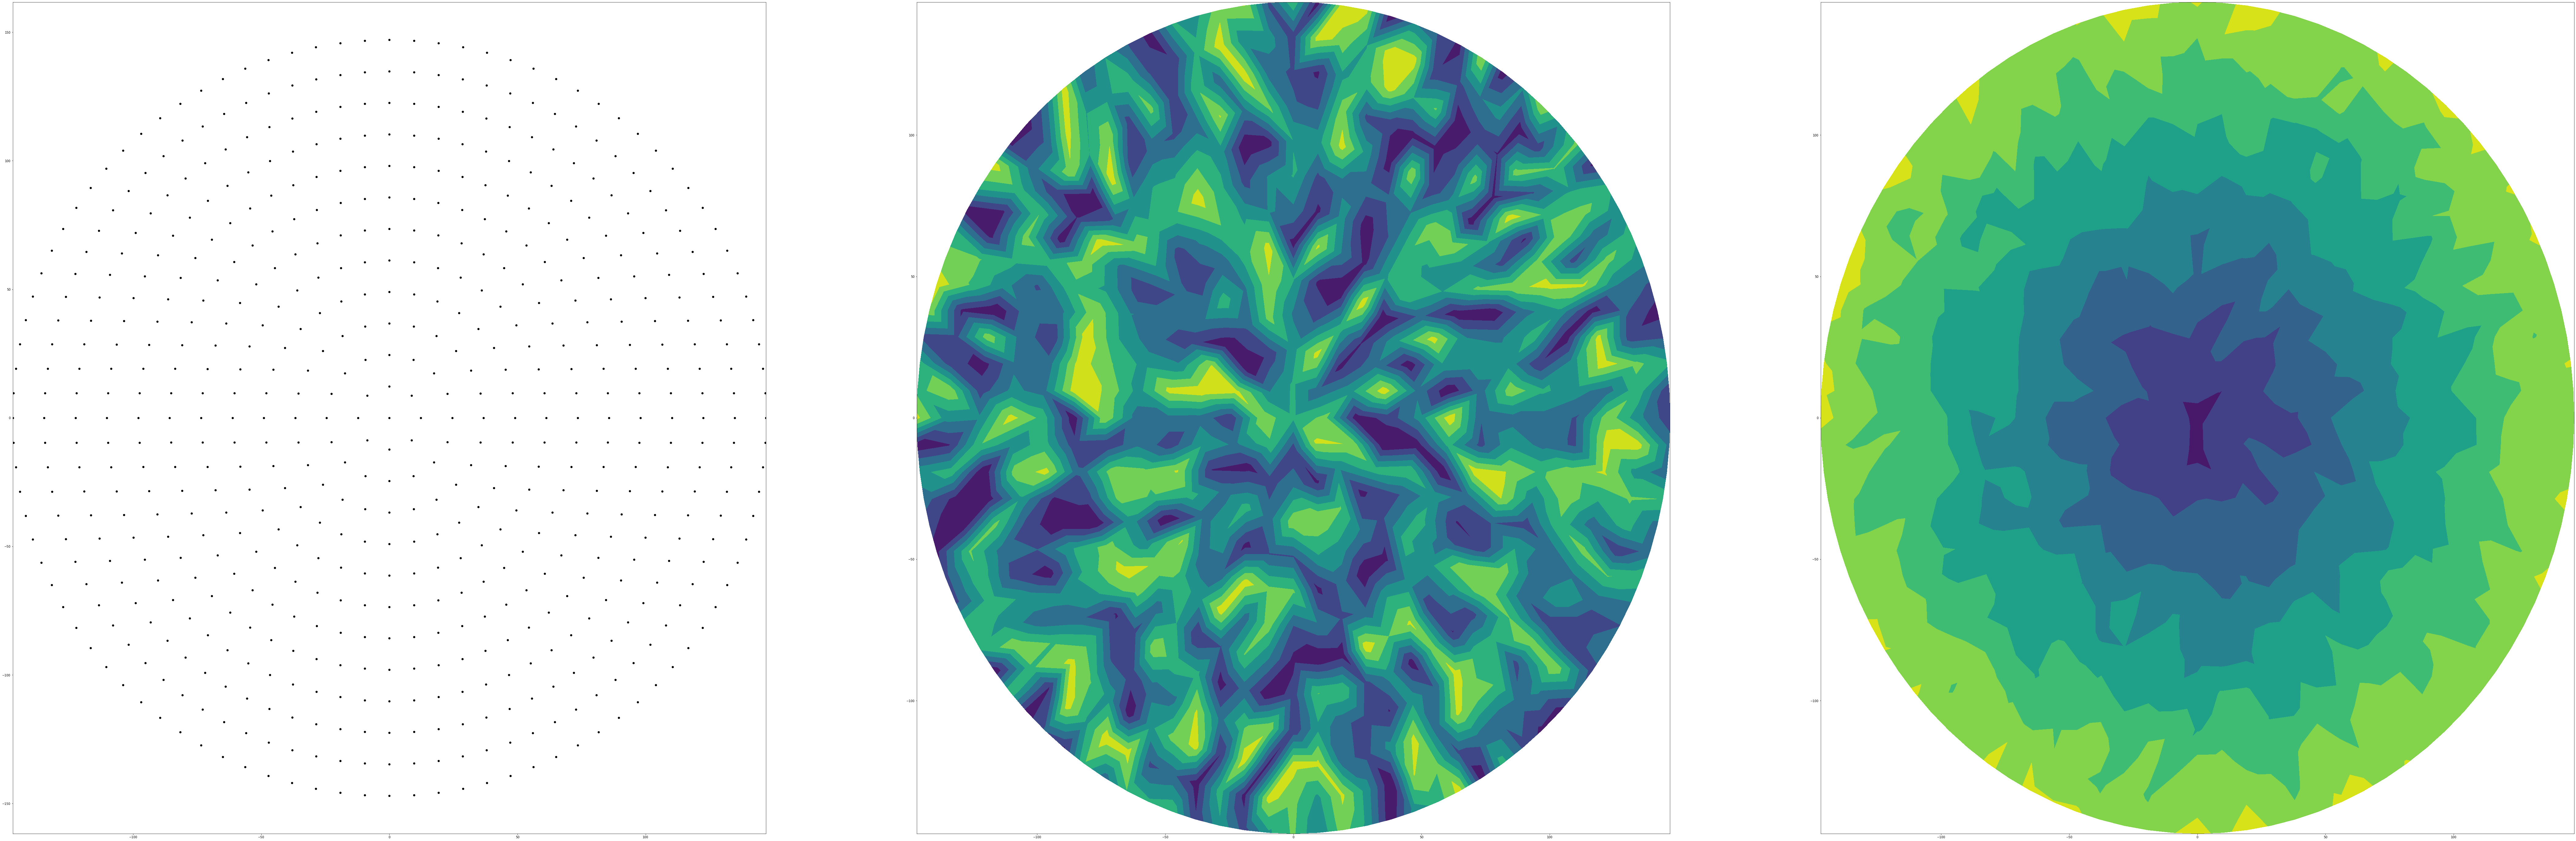

In [222]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(150, 50))
ax1.plot(data.X, data.Y, 'o', color='black')
ax2.tricontourf(data.X, data.Y, data.Noise)
ax3.tricontourf(data.X, data.Y, data.Thickness_Concave)